In [1]:
# Import necessary libraries
from fastai.basics import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.callback.all import *

from fastai.metrics import *
from fastai.callback.wandb import *
from pathlib import Path
import wandb

from random import sample, randint

import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 16 ,8

In [66]:
orig_mask_path = Path("/scratch/rc4499/pneumonia/imgs_orig")
orig_mask_fnames = get_image_files(orig_mask_path)

# new_mask_path = Path("/scratch/rc4499/class_check/pneumonia_masked/combined")
new_mask_path = Path("/scratch/rc4499/masked/pneumonia/convex_hull")
new_mask_fnames = get_image_files(new_mask_path)

orig_mask_fnames.sort()
new_mask_fnames.sort()

my_len = len(orig_mask_fnames)
len(orig_mask_fnames), len(new_mask_fnames) 

(5856, 5856)

In [67]:
orig_mask_fnames[1001],new_mask_fnames[1001]

(Path('/scratch/rc4499/pneumonia/imgs_orig/train/NORMAL/IM-0549-0001-0002.jpeg'),
 Path('/scratch/rc4499/masked/pneumonia/convex_hull/train/NORMAL/IM-0618-0001.jpeg'))

In [68]:
def label_func_int(fname):
    fname = str(fname)
    if "/NORMAL/" in fname:
        return 0
    elif "/PNEUMONIA/" in fname:
        return 1
    else:
        raise Exception("Invalid file path")

def label_func_pneumonia(fname):
    fname = str(fname)
    if "/NORMAL/" in fname:
        return "NORMAL"
    elif "/PNEUMONIA/" in fname:
        return "PNEUMONIA"
    else:
        raise Exception("Invalid file path")

In [69]:
classes = np.zeros(shape=(2,2))

for item in orig_mask_fnames:
    c = label_func_int(item)
    classes[0][c] += 1
    
for item in new_mask_fnames:
    c = label_func_int(item)
    classes[1][c] += 1

classes

array([[1583., 4273.],
       [1583., 4273.]])

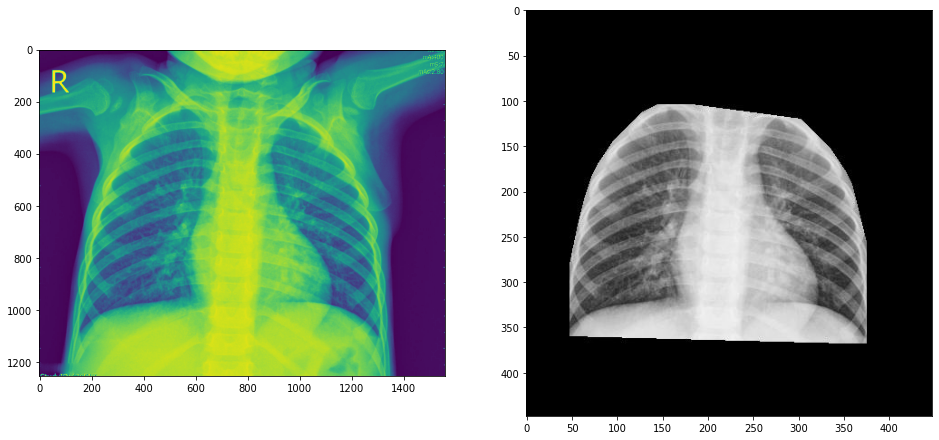

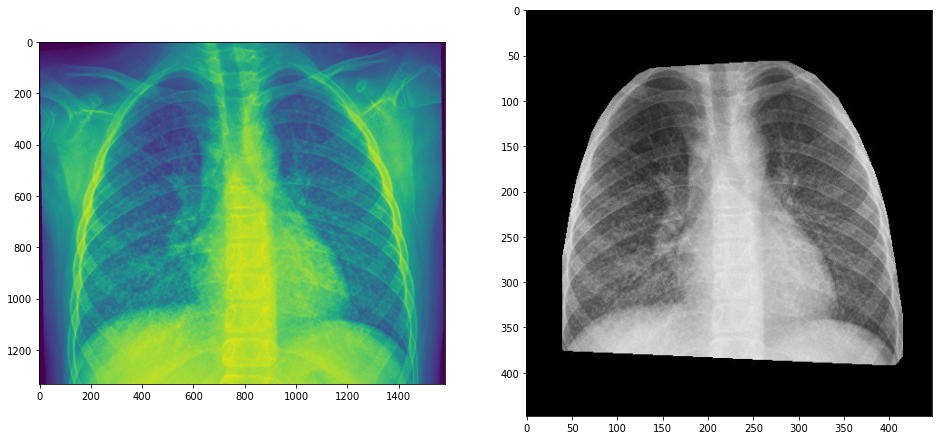

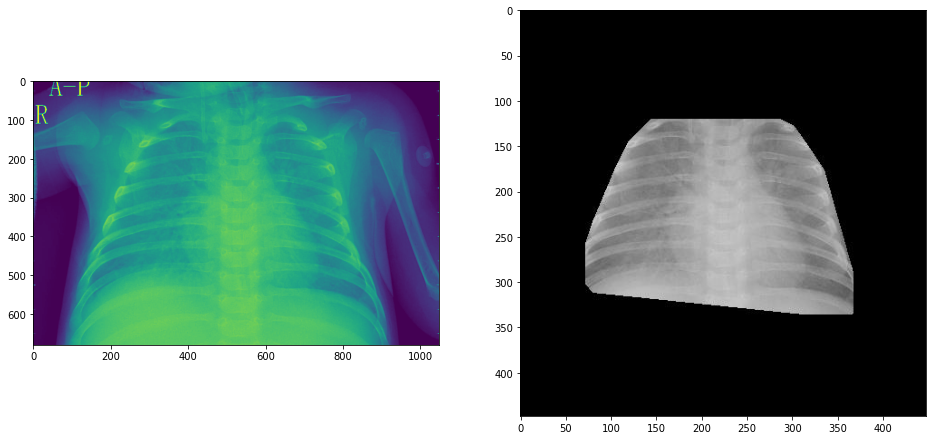

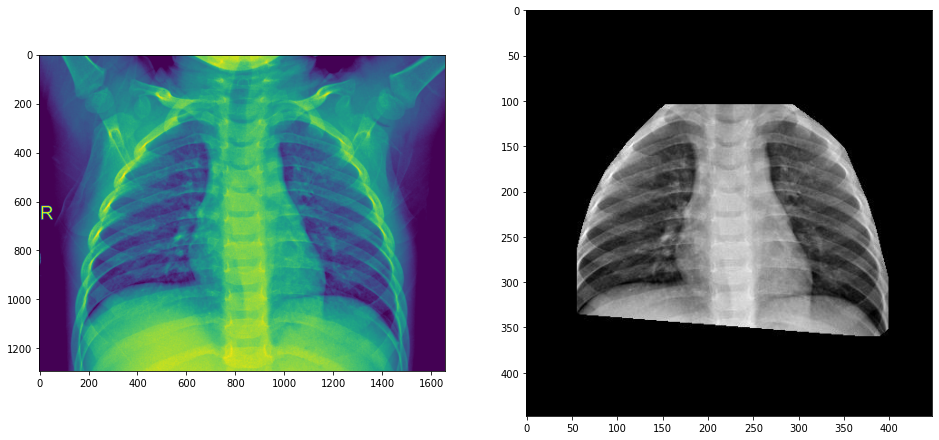

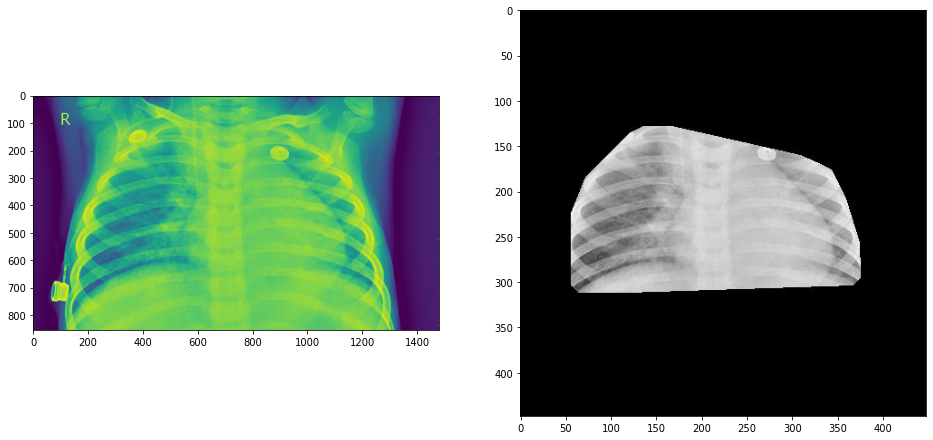

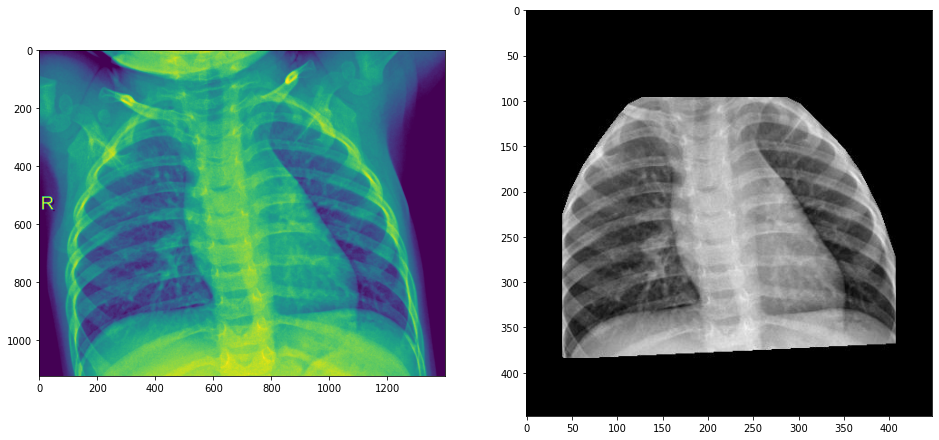

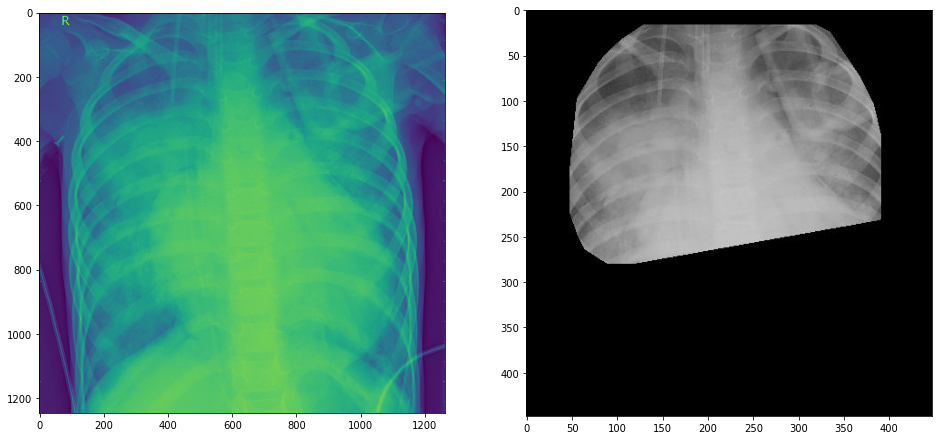

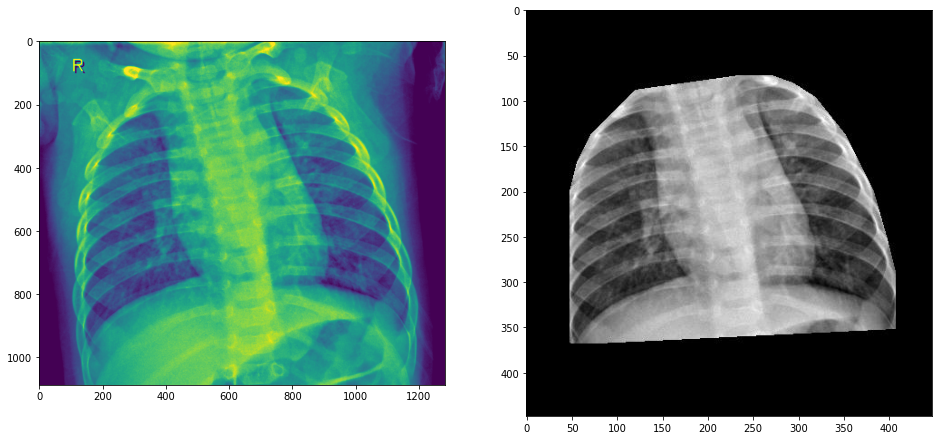

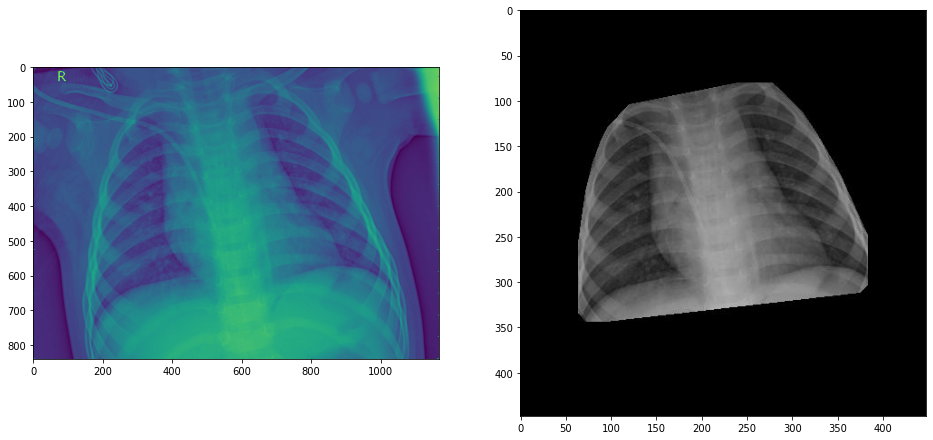

In [81]:
my_sample = sample(new_mask_fnames, 20)

for new_fname in my_sample:
    c_path = label_func_pneumonia(new_fname)
    
    orig_fname = f"/scratch/rc4499/pneumonia/imgs/{c_path}/{new_fname.name}"
    # print(f"Opening {orig_fname} and {new_fname}")
    rand_i = randint(0, my_len - 1)
    
    # orig_fname = orig_mask_fnames[rand_i]
    # new_fname = new_mask_fnames[rand_i]
    
    # print(rand_i, orig_fname, new_fname)
    
    # read images
    img_A = mpimg.imread(orig_fname)
    img_B = mpimg.imread(new_fname)

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A);
    ax[1].imshow(img_B)
    # ax[2].imshow(orig, cmap="gray")
    # ax[3].imshow(clean, cmap="gray")
    # ax[4].imshow(clean_close, cmap="gray")

# Check combined vs split images

In [62]:
orig_mask_path = Path("/scratch/rc4499/split_check/none/combined")
orig_mask_fnames = get_image_files(orig_mask_path)

# new_mask_path = Path("/scratch/rc4499/class_check/pneumonia_masked/combined")
new_mask_path = Path("/scratch/rc4499/split_check/split/none")
new_mask_fnames = get_image_files(new_mask_path)

orig_mask_fnames.sort()
new_mask_fnames.sort()

my_len = len(orig_mask_fnames)
len(orig_mask_fnames), len(new_mask_fnames) 

(5856, 5856)

(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)
(448, 448, 3) (448, 448, 3)


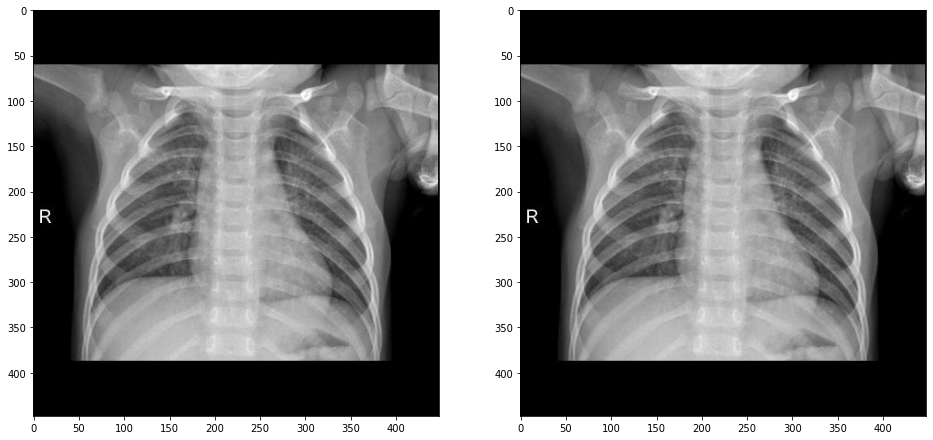

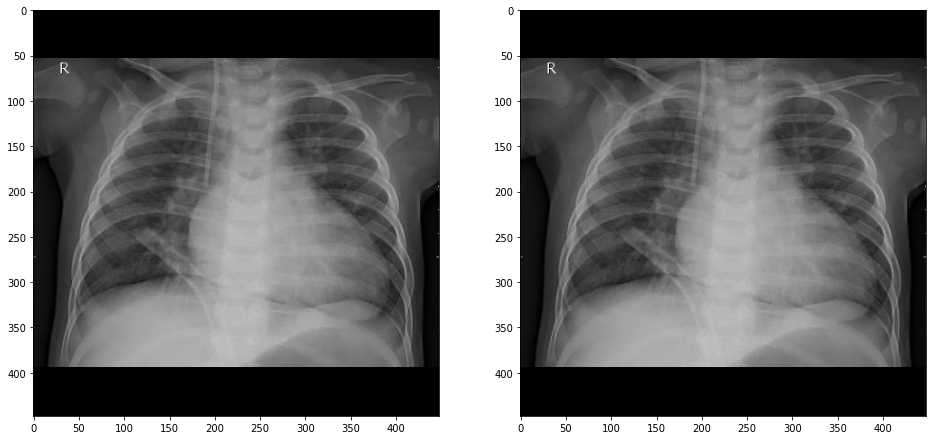

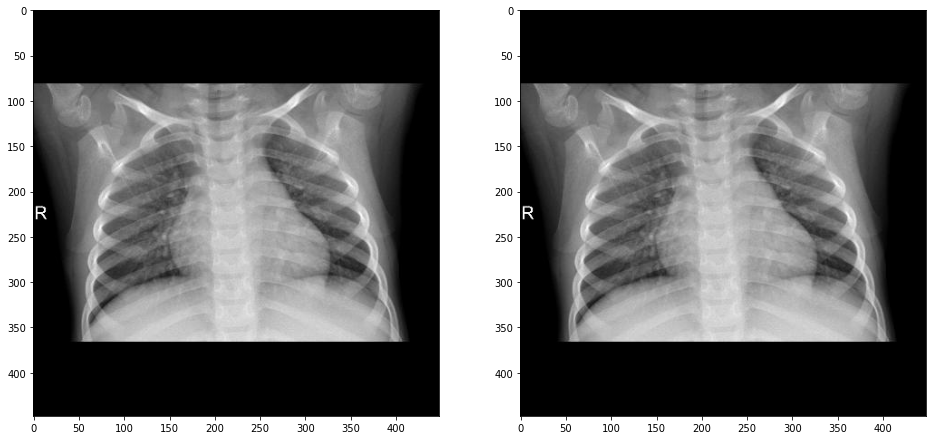

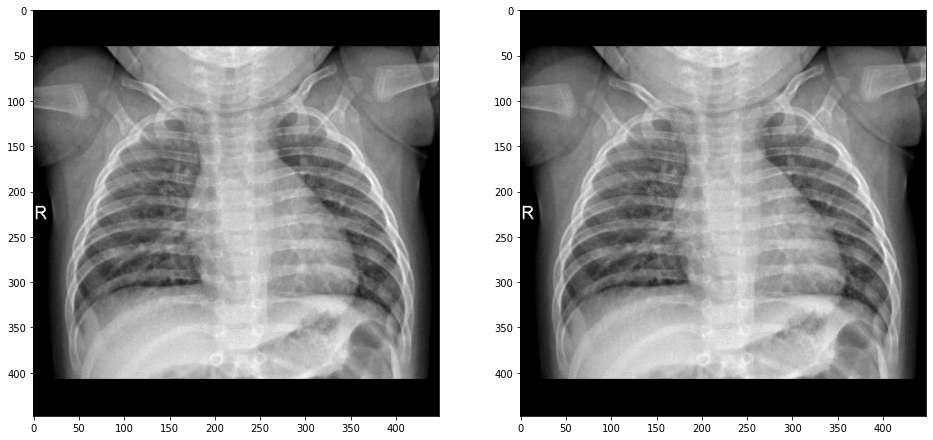

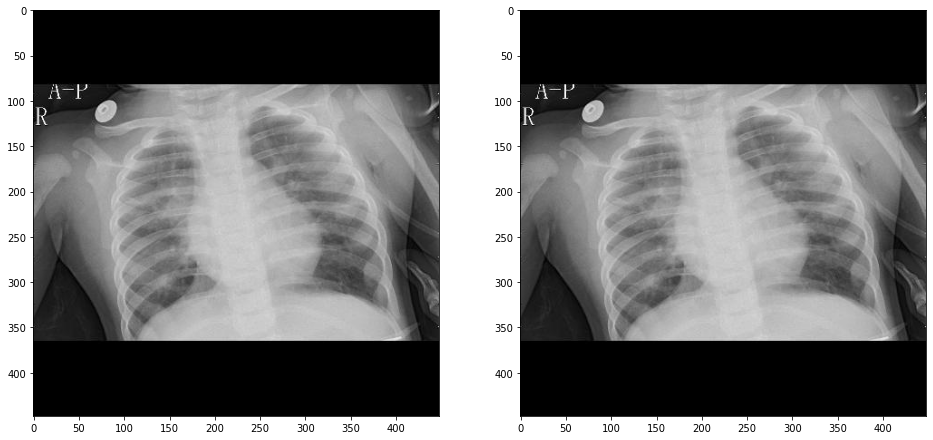

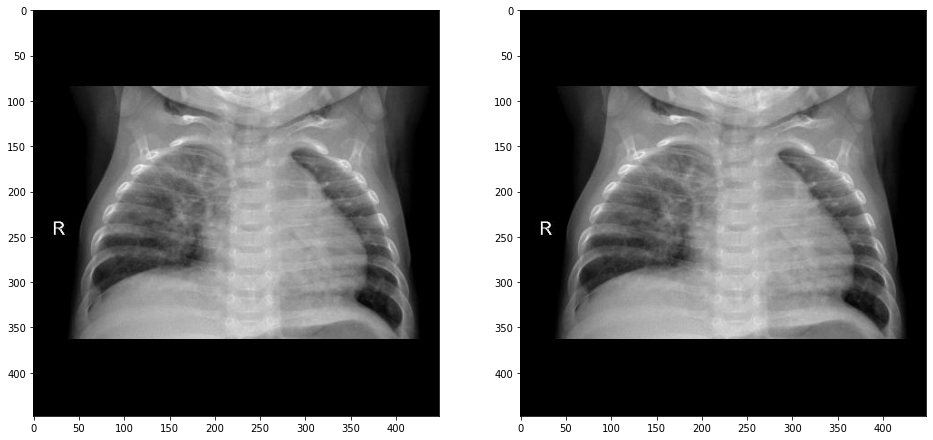

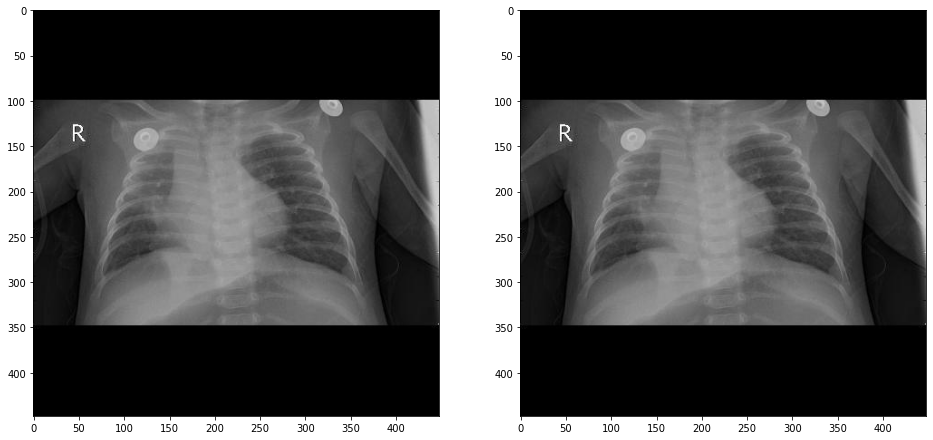

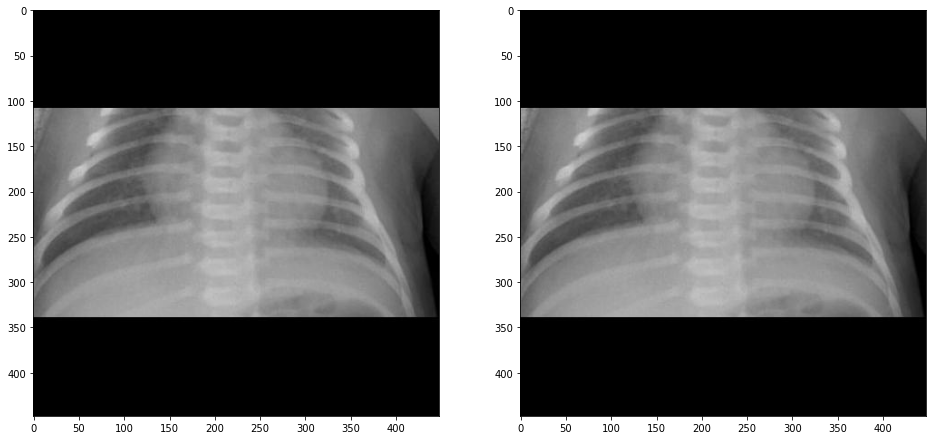

In [63]:
my_sample = sample(orig_mask_fnames, 10)

for combined_fpath in my_sample:
    combined_fname = combined_fpath.name
    split_fpath = next(x for x in new_mask_fnames if combined_fname in str(x))
    # print(combined_fpath)
    # print(split_fpath)
    # print()
    # read images
    img_A = mpimg.imread(combined_fpath)
    img_B = mpimg.imread(split_fpath)
    
    print(img_A.shape, img_B.shape)

    # display images
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img_A);
    ax[1].imshow(img_B)